In [320]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [321]:
#reading the csv file and printing its shape
df = pd.read_csv('train.csv')
print(df.shape)

(1460, 81)


In [322]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [323]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [324]:
#We will drop the column ID as its not useful to us
df.drop('Id', axis = 1, inplace = True)
print(df.shape)

(1460, 80)


In [325]:
df.value_counts(normalize = True)

Series([], dtype: float64)

In [326]:
#percentage of null values 
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),2) > 0 ] )

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtCond         2.53
BsmtQual         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


In [327]:
# Dropping every coulmn with more than 45% of null values
df_dropped = df.drop(['Alley','FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
df_dropped.shape

(1460, 75)

In [328]:
# Checking the number of numerical features and the number of categorical features
num_col = []
cat_col = []
for i in df_dropped.columns:
    if df_dropped[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
print(len(num_col) ,'numerical features')
print(len(cat_col), 'categorical features')

37 numerical features
38 categorical features


In [329]:
# Creating a new Column to determine the age of the property
df_dropped['age']=df_dropped['YrSold']-df_dropped['YearBuilt']
df_dropped['garage_age'] = df_dropped['YrSold'] - df_dropped['GarageYrBlt']

df_dropped.drop(['GarageYrBlt','YearBuilt'],axis=1,inplace=True)

## Handling Missing Values


In [330]:
#From the Data Description
#NA = No Garage
df_dropped['GarageCond'] = df_dropped['GarageCond'].fillna('None')
df_dropped['GarageType'] = df_dropped['GarageType'].fillna('None')
df_dropped['GarageFinish'] = df_dropped['GarageFinish'].fillna('None')
df_dropped['GarageQual'] = df_dropped['GarageQual'].fillna('None')
df_dropped['garage_age'] = df_dropped['GarageQual'].fillna(0)   #No Garage No Age
#NA = No Basement
df_dropped['BsmtExposure'] = df_dropped['BsmtExposure'].fillna('None')
df_dropped['BsmtFinType2'] = df_dropped['BsmtFinType2'].fillna('None')
df_dropped['BsmtCond'] = df_dropped['BsmtCond'].fillna('None')
df_dropped['BsmtQual'] = df_dropped['BsmtQual'].fillna('None')
df_dropped['BsmtFinType1'] = df_dropped['BsmtFinType1'].fillna('None')
#NA = No Masonery Area
df_dropped['MasVnrType'] = df_dropped['MasVnrType'].fillna('None')
df_dropped['MasVnrArea'] = df_dropped['MasVnrArea'].fillna(0)

In [331]:
#LotFrontage : Replacing Null value with the median of the neighbourhood
df_dropped['LotFrontage'] = df_dropped.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [332]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [333]:
df_dropped.shape

(1460, 75)

In [334]:
#Electrical column has one missing value can replace it with mode as its most likely
df_dropped['Electrical'] = df_dropped['Electrical'].fillna(df_dropped['Electrical'].mode()[0])

In [335]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

## Exploratory Data Analysis

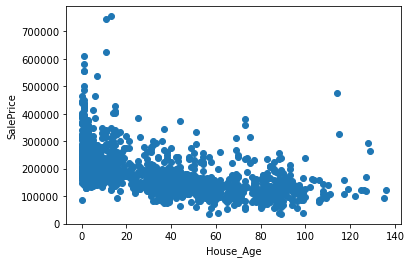

In [336]:
#Visualising SalePrice with property age
plt.scatter(x=df_dropped['age'], y=df_dropped['SalePrice'])
plt.xlabel("House_Age"); plt.ylabel("SalePrice")
plt.show()

#### We see that as the property ages its value decreases

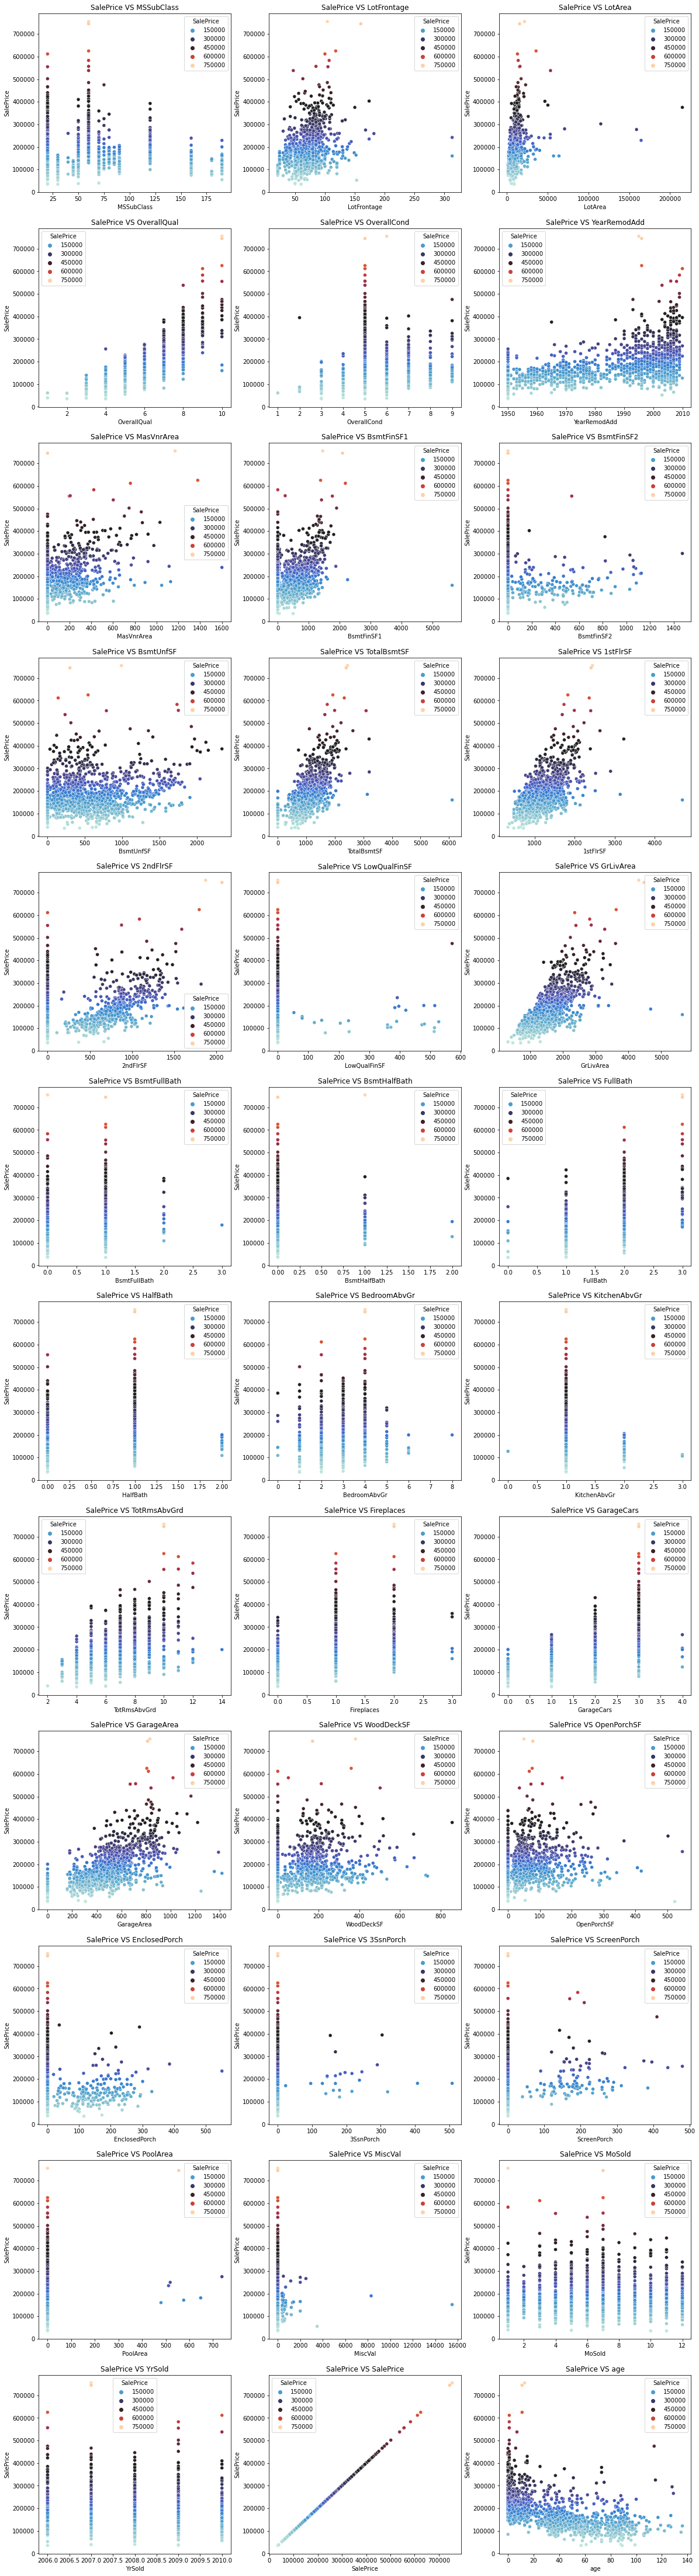

In [337]:
#Visualising numerical predictor variables with Target Variables
df_num = df_dropped.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='icefire')
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    ax.set_title('SalePrice'+' VS '+str(i))

#### We can see that:

##### New properties are more expensive than the old properties.
##### GRLiving Area has a direct correlation with the price of the property.
##### Total basement area, which is linearly related with the total living area, also is directly proportional to the price of the property.
##### Month sold has no effect on the price.

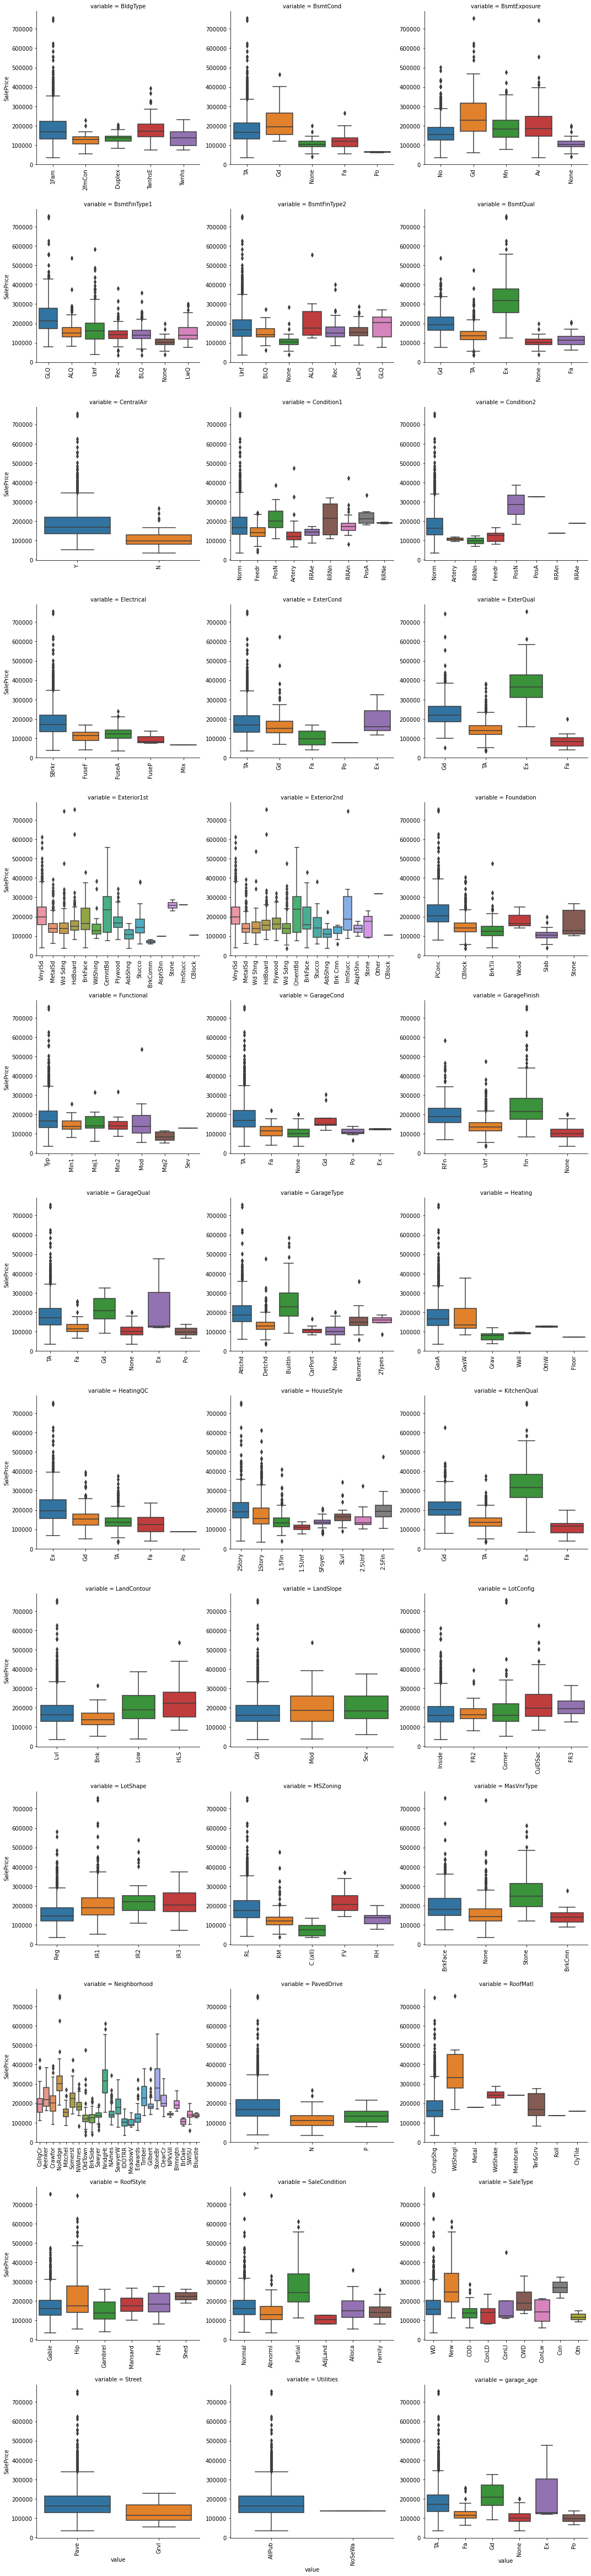

In [338]:
# Plotting Categorical Features with Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = df_dropped.select_dtypes(exclude=['int64','float64'])
f = pd.melt(df_dropped, id_vars=['SalePrice'], value_vars=sorted(df_dropped[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

#### There are a few outliers which we handle in the feature engineering section by capping them to a lower percentile. From the above box plots we see that

1. Paved alleys properties demand a higher price.
2. Houses where the basement quality is good and excellent are sold at higher prices compared to others.
3. Houses with good and excelent garages are sold at higher prices.
4. Houses with good quality kitchens also impact the price in a postive way.

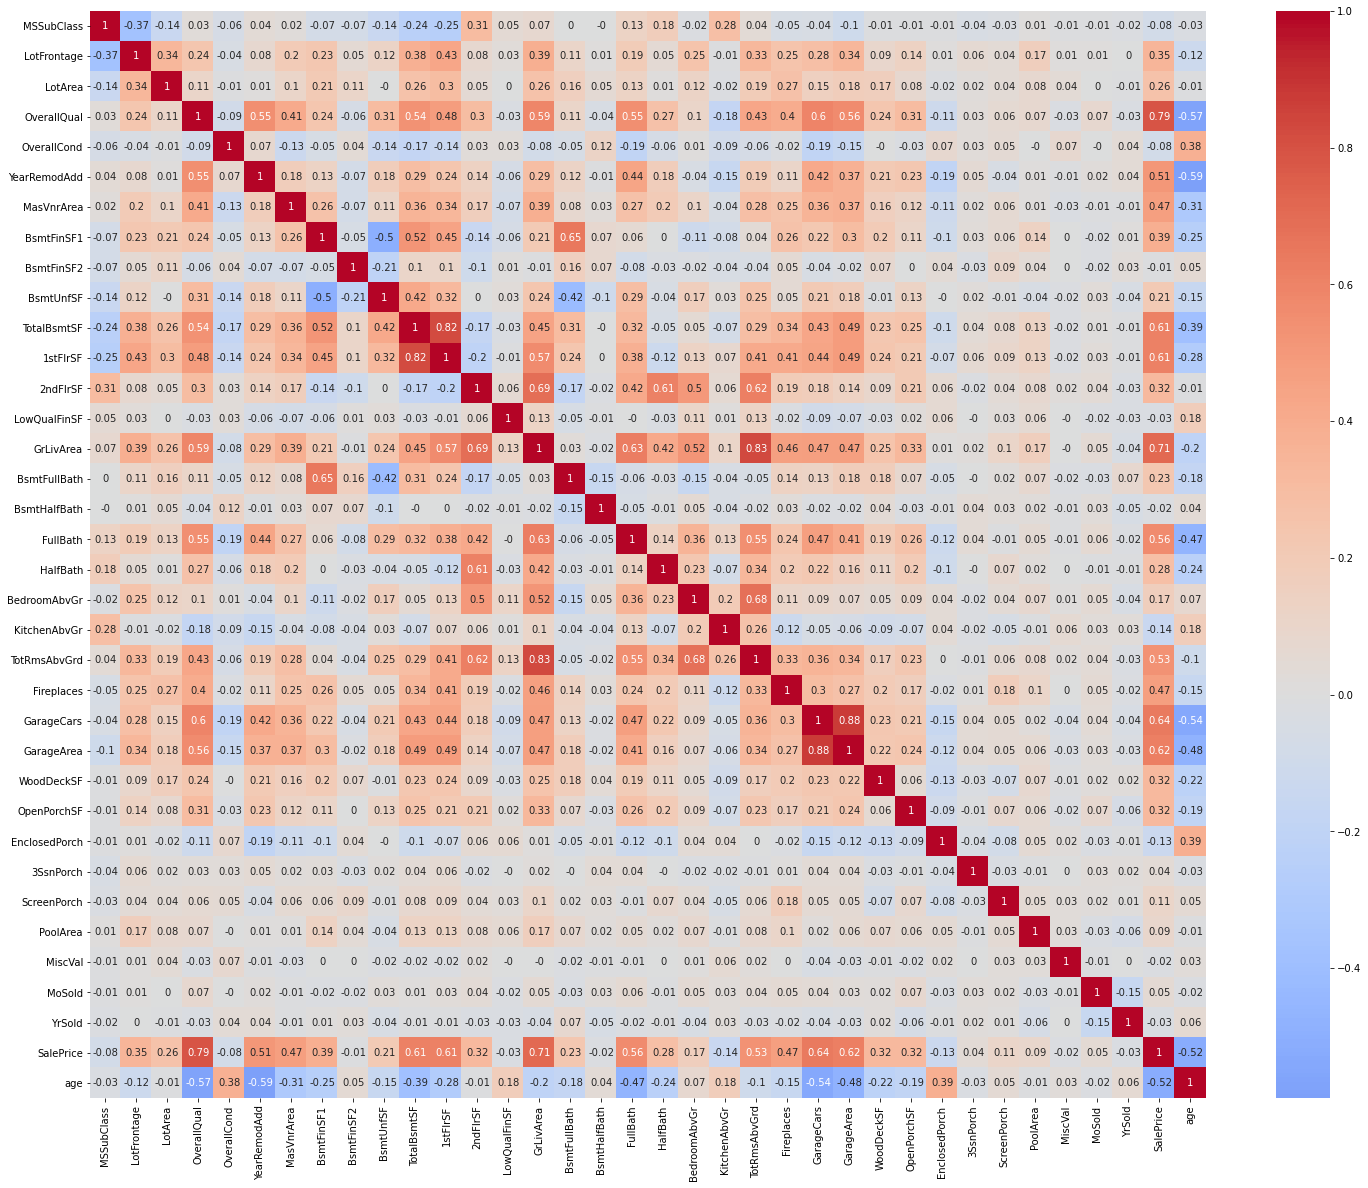

In [339]:
#Plotting heatmap of numerical features
plt.subplots(figsize = (25,20))
sns.heatmap(round(df_num.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

##### We see that there are a few highly correlated values

In [340]:
#Identifying highly correlated varaibles
corr_matrix = df_dropped.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
col_to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [341]:
#Dropping above columns
df_dropped.drop(df[col_to_drop], axis=1, inplace = True)

In [342]:
df_dropped.shape

(1460, 72)

### Getting Dummy variables

In [343]:
#Recalling the numerical columns and categorical columns as we dropped some
cat_col = []
NumCols = []

for col in list(df_dropped):
    if df_dropped[col].dtypes == 'object':
        cat_col.append(col)  
    else:
        NumCols.append(col)
print('Non-Numerical columns:\n',cat_col)

print('Numerical columns:\n',NumCols)

Non-Numerical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'garage_age']
Numerical columns:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',

In [344]:
#getting dummies for all other categorical variables
df_dummy = pd.get_dummies(df_dropped[cat_col], drop_first=True)

In [345]:
#Concating the main dataframe with dummies
df_concat = pd.concat([df_dropped, df_dummy], axis=1)
df_concat.shape

(1460, 282)

In [346]:
#Dropping the original columns from which dummies were created
df_final = df_concat.drop(cat_col, axis = 1)
df_final.shape

(1460, 243)

### Splitting the dataset to train and test dataset

In [347]:
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [349]:
#Scaling the numerical columns
scaler = StandardScaler()
NumCols1 = NumCols.copy()
NumCols1.remove('SalePrice')
X_train[NumCols1] = scaler.fit_transform(X_train[NumCols1])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,garage_age_Fa,garage_age_Gd,garage_age_None,garage_age_Po,garage_age_TA
210,-0.657071,-0.136829,-0.473765,-0.779861,0.383154,-1.694350,-0.558025,0.043512,-0.293313,-0.374367,...,0,0,0,1,0,0,0,1,0,0
318,0.035976,0.889247,-0.056845,0.649651,-0.533005,0.390956,0.809137,1.160345,-0.293313,-0.454644,...,0,0,0,1,0,0,0,0,0,1
239,-0.195040,-0.806009,-0.169324,-0.065105,-1.449164,-1.694350,-0.558025,-0.761296,-0.293313,0.171964,...,0,0,0,1,0,0,0,0,0,1
986,-0.195040,-0.493725,-0.502297,-0.065105,2.215472,0.875911,-0.558025,-0.963574,-0.293313,-0.175904,...,0,0,0,1,0,1,0,0,0,0
1416,3.039179,-0.449113,0.082905,-1.494617,0.383154,-1.694350,-0.558025,-0.963574,-0.293313,0.475233,...,0,0,0,1,0,0,0,0,0,1


In [350]:
X_test[NumCols1] = scaler.transform(X_test[NumCols1])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,garage_age_Fa,garage_age_Gd,garage_age_None,garage_age_Po,garage_age_TA
1436,-0.888086,-0.449113,-0.144189,-1.494617,0.383154,-0.675945,-0.558025,0.361992,-0.293313,-0.704396,...,0,0,0,1,0,0,0,0,0,1
57,0.035976,0.844635,0.112505,0.649651,-0.533005,0.924407,-0.558025,-0.963574,-0.293313,0.660317,...,0,0,0,1,0,0,0,0,0,1
780,-0.888086,-0.315277,-0.253368,0.649651,-0.533005,0.536443,-0.355087,-0.963574,-0.293313,1.500998,...,0,0,0,1,0,0,0,0,0,1
382,0.035976,0.398515,-0.120412,0.649651,-0.533005,1.021398,-0.558025,-0.963574,-0.293313,0.836481,...,0,0,0,1,0,0,0,0,0,1
1170,0.498007,0.264679,-0.058786,-0.065105,0.383154,-0.384972,-0.558025,0.159714,-0.293313,0.022559,...,0,0,0,1,0,0,0,0,0,1


## Model Building and Evaluation

### Ridge Regression

In [351]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [352]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012592,0.001200,0.004997,0.000895,0.0001,{'alpha': 0.0001},-18575.215421,-20534.744019,-20719.065533,-21046.305344,...,-19841.413753,1147.616748,18,-11820.456722,-11549.696471,-11995.726056,-12192.196415,-11597.621145,-11831.139362,241.373550
1,0.012394,0.002058,0.005595,0.000489,0.001,{'alpha': 0.001},-18529.195500,-20524.072829,-20676.270121,-20918.653187,...,-19785.984987,1136.891506,15,-11824.375560,-11549.230030,-11990.006701,-12187.499852,-11606.574956,-11831.537419,237.562047
2,0.012594,0.002153,0.004795,0.001166,0.01,{'alpha': 0.01},-18374.220805,-20432.826339,-20568.671696,-20023.518723,...,-19486.050872,1068.701416,12,-11951.333210,-11546.524630,-12061.972543,-12200.412904,-11786.042316,-11909.257121,226.548377
3,0.011598,0.001617,0.005193,0.000745,0.05,{'alpha': 0.05},-18947.757680,-20219.039183,-21001.396937,-18796.388954,...,-19567.945582,887.537127,14,-12846.601454,-11573.377601,-12857.441866,-12849.154218,-12721.408320,-12569.596692,500.647209
4,0.010596,0.000801,0.004200,0.000397,0.1,{'alpha': 0.1},-19313.147139,-20146.442093,-21447.985444,-18433.974206,...,-19813.357370,994.346780,16,-13467.389427,-11613.996247,-13422.492151,-13483.115234,-13355.454193,-13068.489451,728.594934


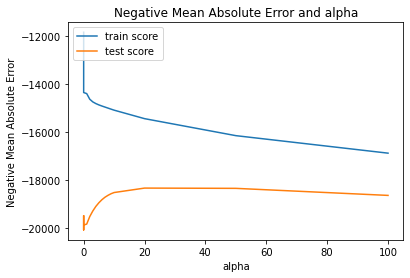

In [353]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [354]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-7.41337270e+03, -3.00240238e+03,  4.23488004e+03,  1.51455213e+04,
        5.18270757e+03,  2.08895591e+03,  3.83847852e+03, -2.50914601e+02,
        1.25801476e+03,  1.50733387e+03,  1.68698994e+03,  1.00713715e+04,
       -1.61393981e+03,  2.34691806e+04,  5.32006981e+03,  7.68763390e+02,
        3.51251712e+03,  6.20058836e+02, -8.28418199e+02, -2.64906208e+03,
        2.69429881e+03,  9.65992770e+03,  1.93846789e+03, -7.37678778e+02,
        6.32497390e+02,  1.53817303e+03,  1.24868234e+03, -4.12683315e+02,
       -4.00166693e+01, -7.12626430e+02, -8.75709771e+02, -5.29681454e+03,
        3.95419469e+03,  2.93983268e+03,  6.12723928e+03, -1.63683444e+02,
        6.17199612e+03,  1.62259073e+03, -1.11495063e+04,  7.39749474e+02,
        1.07737656e+04,  7.16134423e+03,  1.38632400e+04, -3.11506229e+03,
        8.09735082e+03, -8.35834144e+03, -2.33170963e+03, -1.73697589e+03,
        6.46685291e+03, -1.81493055e+03, -9.23331012e+02,  2.32618147e+02,
       -4.76106597e+02,  

### Lasso Regression

In [355]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [356]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.229668,0.013812,0.005198,0.000748,0.0001,{'alpha': 0.0001},-18576.575263,-20486.392093,-20711.035925,-20858.949001,...,-19792.965747,1102.216039,25,-11818.715112,-11548.331150,-11996.890893,-12195.059288,-11597.192492,-11831.237787,242.807421
1,0.220074,0.020814,0.004797,0.001165,0.001,{'alpha': 0.001},-18576.289182,-20485.368303,-20711.877465,-20865.956883,...,-19794.119045,1103.853865,26,-11818.712131,-11548.311535,-11996.890153,-12195.060392,-11597.201554,-11831.235153,242.810506
2,0.259651,0.068748,0.004398,0.000799,0.01,{'alpha': 0.01},-18573.458219,-20475.072323,-20713.176915,-20922.385293,...,-19801.818500,1116.187924,27,-11818.706098,-11548.197718,-11996.889404,-12195.076120,-11597.297471,-11831.233362,242.823222
3,0.239061,0.032000,0.004998,0.003520,0.05,{'alpha': 0.05},-18560.893140,-20429.217211,-20709.725519,-20929.793094,...,-19788.801625,1117.298109,24,-11818.698306,-11547.993883,-11997.085186,-12195.137470,-11597.819067,-11831.346782,242.815538
4,0.252255,0.039950,0.007796,0.005112,0.1,{'alpha': 0.1},-18545.295226,-20385.472637,-20703.097397,-20922.760044,...,-19772.050209,1116.106381,23,-11818.693368,-11547.639441,-11997.747032,-12195.445051,-11598.800205,-11831.665019,242.892553


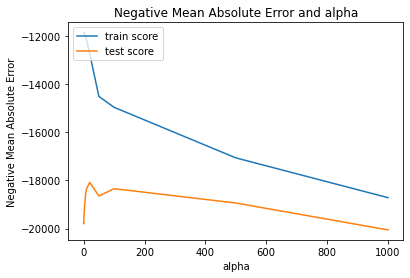

In [357]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [358]:
alpha =100
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-7.74578976e+03, -2.52240536e+03,  4.08718344e+03,  1.41979222e+04,
        5.48807957e+03,  2.23344048e+03,  3.40375196e+03, -0.00000000e+00,
        9.03037352e+02,  9.92214157e+02,  1.91651913e+03,  7.11988727e+03,
       -1.93641892e+03,  2.63512438e+04,  5.17428217e+03,  6.87923220e+02,
        3.22493674e+03,  2.38879905e+01, -1.40401539e+03, -3.14157198e+03,
        1.80303128e+03,  8.40036124e+03,  1.48307894e+03, -0.00000000e+00,
        4.95913953e+02,  1.19743409e+03,  1.13211474e+03, -7.98954705e+02,
       -7.57028225e+01, -4.43233112e+02, -6.46880622e+02, -6.52905687e+03,
        0.00000000e+00,  0.00000000e+00,  5.97923304e+03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.78817315e+04,  2.37010974e+02,
        6.62627755e+03,  6.59210900e+03,  1.02144023e+04, -0.00000000e+00,
        8.62998375e+03, -5.30402738e+03, -0.00000000e+00, -0.00000000e+00,
        2.03835142e+03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [359]:
#Predicting y values of train dataset with both the models
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)

Error distribution in train dataset


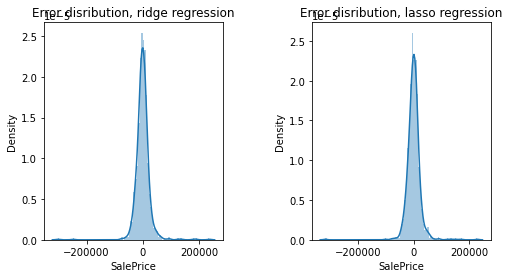

In [360]:
#Plotting Error distribution
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

##### Errors are normally distributed in both the models

In [361]:
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))

r2_score in train dataset
r2_score for ridge: 0.8936536348994919
r2_score for lasso: 0.903008219606722


In [362]:
#Predicting y values of test dataset with both the models
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

Error distribution in test dataset


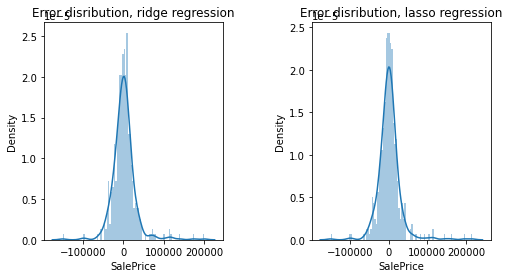

In [363]:
#Plotting Error distribution
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

#### Errors are normally distributed in both the models

In [364]:
# Comparing the results

print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for ridge: 0.89
r2_score for lasso: 0.9
r2_score in test dataset:
r2_score for ridge: 0.87
r2_score for lasso: 0.86


In [365]:
# Comparing the results

print('MSE in train dataset:')
print('MSE for ridge:', round(mean_squared_error(y_train, y_pred_ridge_train), 2))
print('MSE for lasso:', round(mean_squared_error(y_train, y_pred_lasso_train), 2))

print('MSE in test dataset:')
print('MSE for ridge:', round(mean_squared_error(y_test, y_pred_ridge_test), 2))
print('MSE for lasso:', round(mean_squared_error(y_test, y_pred_lasso_test), 2))

MSE in train dataset:
MSE for ridge: 664607369.37
MSE for lasso: 606146265.15
MSE in test dataset:
MSE for ridge: 843448768.34
MSE for lasso: 907727367.49


In [366]:
# Let's compare the co-efficients
comp = pd.DataFrame(index=X.columns)
comp.rows = X.columns
comp['Ridge'] = ridge.coef_
comp['Lasso'] = lasso.coef_
len(comp)

242

In [367]:
pd.set_option('display.max_rows', None)
comp.head(242)

,Ridge,Lasso
MSSubClass,-7413.372703,-7.745790e+03
LotFrontage,-3002.402382,-2.522405e+03
LotArea,4234.880040,4.087183e+03
OverallQual,15145.521271,1.419792e+04
OverallCond,5182.707567,5.488080e+03
YearRemodAdd,2088.955914,2.233440e+03
MasVnrArea,3838.478525,3.403752e+03
BsmtFinSF1,-250.914601,-0.000000e+00
BsmtFinSF2,1258.014765,9.030374e+02
BsmtUnfSF,1507.333872,9.922142e+02


In [368]:
comp.sort_values('Ridge', ascending = False).head(242)

,Ridge,Lasso
Neighborhood_NoRidge,30264.830808,4.296775e+04
GrLivArea,23469.180618,2.635124e+04
Neighborhood_NridgHt,22963.987001,2.802695e+04
RoofMatl_WdShngl,22655.237451,6.319709e+04
Neighborhood_Crawfor,17214.207616,2.289505e+04
BsmtExposure_Gd,15574.956386,1.944240e+04
OverallQual,15145.521271,1.419792e+04
LandContour_Lvl,13863.239986,1.021440e+04
Neighborhood_Somerst,12559.294080,2.030068e+04
Neighborhood_StoneBr,12530.662809,1.745077e+04


In [369]:
comp.sort_values('Lasso', ascending = False).head(242)

,Ridge,Lasso
RoofMatl_WdShngl,22655.237451,6.319709e+04
Neighborhood_NoRidge,30264.830808,4.296775e+04
Neighborhood_NridgHt,22963.987001,2.802695e+04
GrLivArea,23469.180618,2.635124e+04
Neighborhood_Crawfor,17214.207616,2.289505e+04
Neighborhood_Somerst,12559.294080,2.030068e+04
BsmtExposure_Gd,15574.956386,1.944240e+04
Neighborhood_StoneBr,12530.662809,1.745077e+04
Exterior1st_BrkFace,11603.061089,1.548535e+04
OverallQual,15145.521271,1.419792e+04


## Conclusions

Here we see that there is not considerable variation between r2_score and mean squared errors of the Ridge and Lasso models.
Hence we can consider Lasso as it eliminates few variables by pushing its co-efficients to zero.
But, if the business stakeholders say that the MSE of Lasso is comparitively high which we see in the above results we might have to use Ridge as its MSE is slightly better. 

By considering Lasso Model, we have:
1. RoofMatl_WdShngl--> So the houses having roof material as Wood Shingles cost more.
2. Neighborhood_NoRidge--> The houses in the neighbourhood of North Ridge are expensive.
3. Neighborhood_NridgHt--> The houses in the neighbourhood of Northridge Heights are expensive.
4. GrLivArea--> Houses with ground living area are expensive.
5. Neighborhood_Crawfor--> The houses in the neighbourhood of Crawford are expensive.

So the company should consider these factors as the houses with these facilities in above mentioned neighbourhood is expensive.

# Subjective Questions:

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [370]:
# Building Ridge Model by doubling the value of alpha to 20
ridge_double = Ridge(alpha=20,random_state=100)
ridge_double.fit(X_train,y_train)
ridge_double_coef = ridge_double.coef_
y_test_pred = ridge_double.predict(X_test)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_double_coeff.head(242)

The R2 Score of the model on the test dataset for doubled alpha is 0.8674243191803089
The MSE of the model on the test dataset for doubled alpha is 853179755.1282824
The most important predictor variables are as follows:


,Ridge Doubled Alpha Co-Efficient
Neighborhood_NoRidge,23460.842037
GrLivArea,22259.929048
Neighborhood_NridgHt,18859.102573
OverallQual,16374.955509
BsmtExposure_Gd,13877.423594
Neighborhood_Crawfor,13560.033143
RoofMatl_WdShngl,13222.911196
Condition1_Norm,10953.393873
LandContour_Lvl,10604.947748
GarageCars,10005.778384


In [371]:
# Building Lasso Model by doubling the value of alpha to 200
lasso_double = Lasso(alpha=200,random_state=100)
lasso_double.fit(X_train,y_train)
lasso_double_coef = lasso_double.coef_
y_test_pred = lasso_double.predict(X_test)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double_coef),columns=X_train.columns)
lasso_double_coeff = lasso_double_coeff.T
lasso_double_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_double_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_double_coeff.head(242)

The R2 Score of the model on the test dataset for doubled alpha is 0.8615249859756162
The MSE of the model on the test dataset for doubled alpha is 891144422.7647648
The most important predictor variables are as follows:


,Lasso Doubled Alpha Co-Efficient
Neighborhood_NoRidge,4.148915e+04
Neighborhood_NridgHt,2.679552e+04
RoofMatl_WdShngl,2.635065e+04
GrLivArea,2.454666e+04
Neighborhood_Crawfor,2.026681e+04
BsmtExposure_Gd,1.834621e+04
Neighborhood_Somerst,1.670048e+04
OverallQual,1.645164e+04
Condition1_Norm,1.223357e+04
Exterior1st_BrkFace,1.207891e+04


After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [372]:
#Removing the 5 most important predictor variables from the dataset on Lasso Model
X_test_temp = X_test.drop(['Neighborhood_NoRidge','Neighborhood_NridgHt','RoofMatl_WdShngl','GrLivArea','Neighborhood_Crawfor'],axis=1)
X_train_temp = X_train.drop(['Neighborhood_NoRidge','Neighborhood_NridgHt','RoofMatl_WdShngl','GrLivArea','Neighborhood_Crawfor'],axis=1)

# Building Lasso Model with the new dataset
lasso3 = Lasso(alpha=100,random_state=100)
lasso3.fit(X_train_temp,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test_temp)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train_temp.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso3_coeff.head(237)

The R2 Score of the model on the test dataset is 0.8465262604610531
The MSE of the model on the test dataset is 987667471.9592489
The most important predictor variables are as follows:


,Lasso Co-Efficient
2ndFlrSF,2.853308e+04
Exterior1st_BrkFace,1.892175e+04
OverallQual,1.820965e+04
TotalBsmtSF,1.538944e+04
BsmtExposure_Gd,1.527293e+04
Exterior2nd_ImStucc,1.501630e+04
HouseStyle_1Story,1.288042e+04
GarageCars,1.040278e+04
Condition1_Norm,1.031970e+04
LandContour_Lvl,9.833447e+03
